# M2 ASSIGNMENT 2

## Multiple Linear Regression

## BACKGROUND:
The data for analysis contains information on monthly sales performance (in ₹ ‘000) for various retail outlets.
It includes store-level and marketing-related attributes such as store size, advertising spend, number of nearby competitors, customer rating, customer footfall, and average discount rate.
The dataset contains 800 rows and 7 columns.

## QUESTIONS
1. Import Retail Sales Data.
2. Check the structure and summary of the data.
3. Build a regression model with Sales as the dependent variable.
4. List down significant variables and interpret their regression coefficients.
5. What are the $R^2$ and Adjusted $R^2$ of the model? Give appropriate interpretations.
6. Check for multicollinearity among predictors. If present, take suitable steps to address it.
7. Examine whether the errors (residuals) follow a Normal distribution.
8. Plot residuals vs predicted values and interpret the pattern observed.
9. Calculate the RMSE (Root Mean Squared Error) for the model, defined as the square root of the mean of squared residuals.

In [86]:
import pandas as pd

df = pd.read_csv("RETAIL_SALES_DATA.csv")
df.head()

,Sales,Store_Size,Advertising_Spend,Competitors_Nearby,Customer_Rating,Footfall,Discount_Rate
0,115.81,2248.0,275.1,9,7.5,2199.0,7.90
1,86.17,1931.0,158.7,2,7.0,1458.0,19.30
2,103.42,2324.0,207.7,2,7.8,1788.0,13.80
3,110.94,2762.0,163.0,0,7.7,1990.0,9.38
4,86.71,1883.0,165.2,6,6.6,1596.0,15.71


In [87]:
df.describe()


,Sales,Store_Size,Advertising_Spend,Competitors_Nearby,Customer_Rating,Footfall,Discount_Rate
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,91.106625,1997.121250,207.911750,4.328750,7.022000,1731.541250,13.289850
std,21.508692,488.974802,77.989545,2.818795,1.161444,399.540172,6.640032
min,24.410000,800.000000,50.000000,0.000000,3.700000,634.000000,2.010000
25%,76.375000,1648.750000,153.475000,2.000000,6.200000,1446.750000,7.695000
50%,91.070000,2006.500000,206.200000,4.000000,7.000000,1732.000000,12.870000
75%,105.247500,2314.250000,258.650000,7.000000,7.800000,2005.500000,19.062500
max,154.480000,3926.000000,408.100000,9.000000,10.000000,2823.000000,24.970000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales               800 non-null    float64
 1   Store_Size          800 non-null    float64
 2   Advertising_Spend   800 non-null    float64
 3   Competitors_Nearby  800 non-null    int64  
 4   Customer_Rating     800 non-null    float64
 5   Footfall            800 non-null    float64
 6   Discount_Rate       800 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 43.9 KB


In [89]:
df.isna().sum()

Sales                 0
Store_Size            0
Advertising_Spend     0
Competitors_Nearby    0
Customer_Rating       0
Footfall              0
Discount_Rate         0
dtype: int64

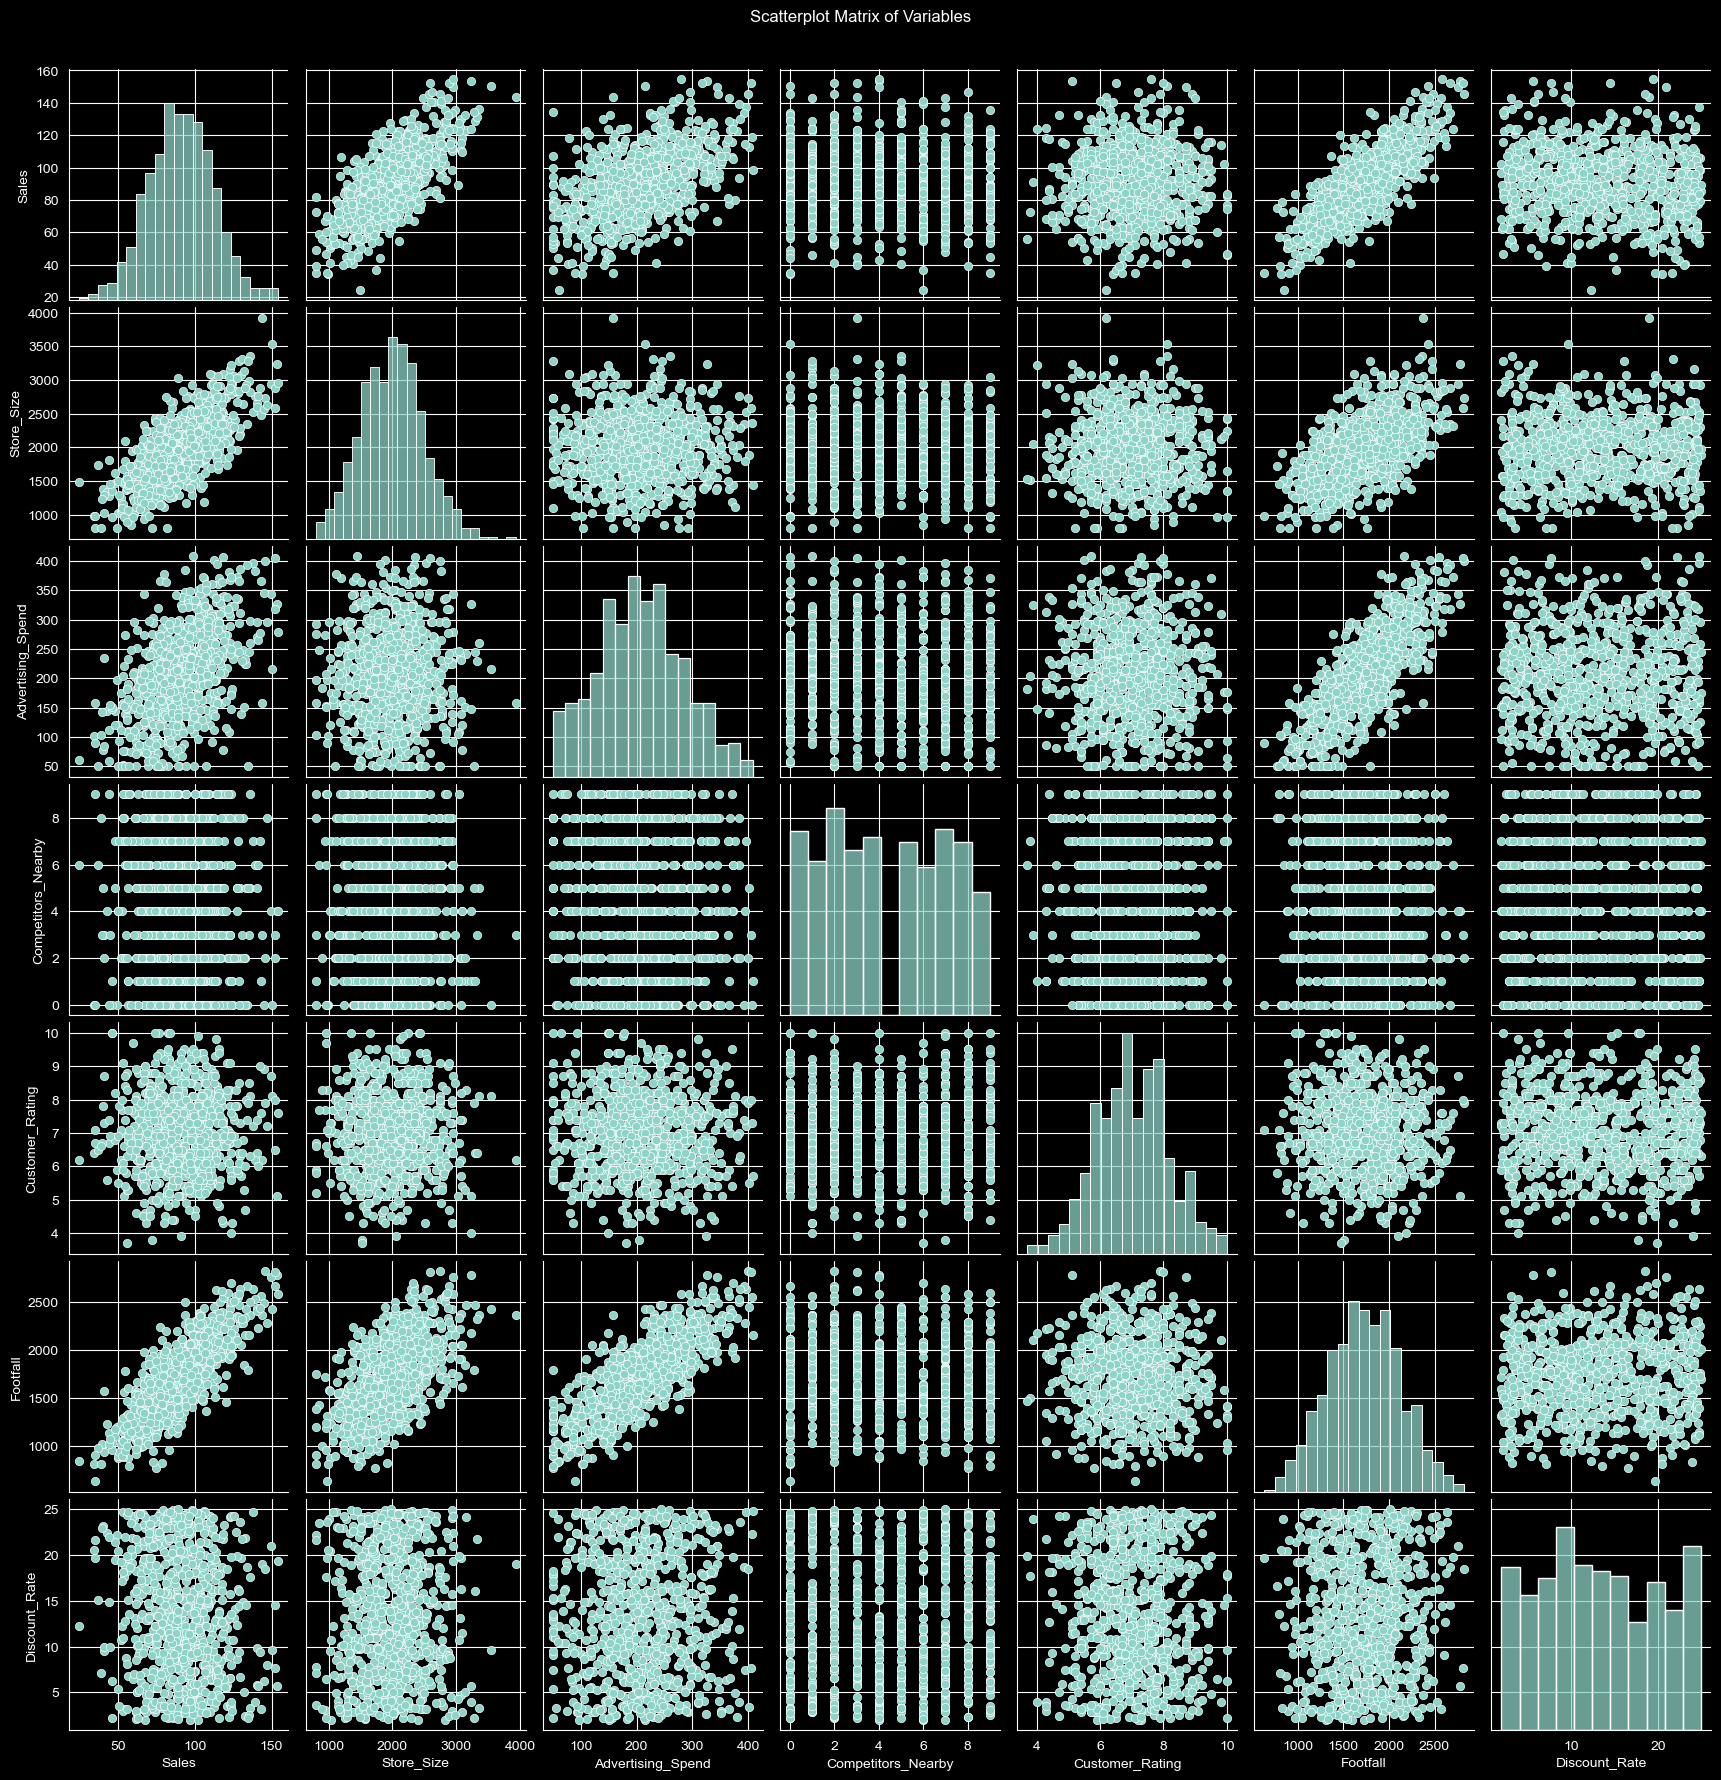

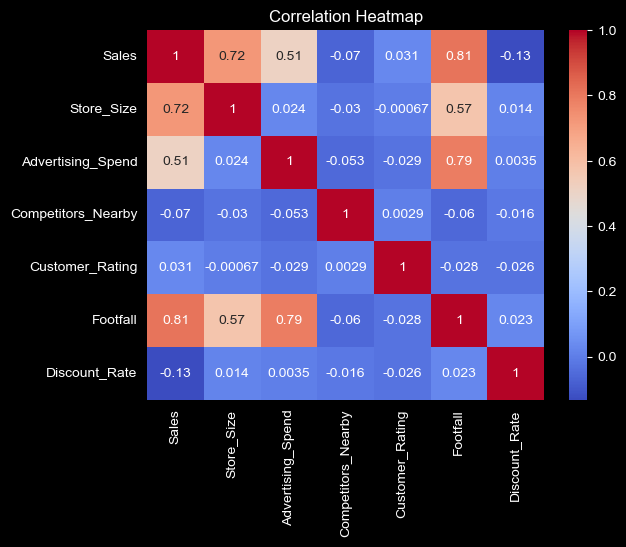

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.suptitle("Scatterplot Matrix of Variables", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Looking at the Correlation Heatmap we could see that `Footfall` has a strong relationship with `Store_Size` and `Advertising_Spend`. High correlations among predictors may indicate potential multicollinearity.

In [103]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(expression):
    y, x = dmatrices(expression, data=df, return_type='dataframe')
    vif_data = pd.DataFrame()
    vif_data['Variable'] = x.columns
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif_data = vif_data[vif_data['Variable'] != 'Intercept'].sort_values('VIF', ascending=False)
    return vif_data

model_expression_full = 'Sales ~ Store_Size + Advertising_Spend + Competitors_Nearby + Customer_Rating + Footfall + Discount_Rate'
print(check_multicollinearity(model_expression_full), "\n")

model_expression_no_footfall = 'Sales ~ Store_Size + Advertising_Spend + Competitors_Nearby + Customer_Rating + Discount_Rate'
print(check_multicollinearity(model_expression_no_footfall), "\n")

             Variable        VIF
5            Footfall  14.766724
2   Advertising_Spend   9.940064
1          Store_Size   5.510491
3  Competitors_Nearby   1.003991
6       Discount_Rate   1.003379
4     Customer_Rating   1.001933 

             Variable       VIF
2   Advertising_Spend  1.004216
3  Competitors_Nearby  1.003923
1          Store_Size  1.001585
4     Customer_Rating  1.001528
5       Discount_Rate  1.001162 



Although the full model has a slightly higher $R^2$ , the VIF values for `Footfall` and its correlated predictors are quite high. By removing `Footfall`, we get a more stable model with similar prediction power and reduced multicollinearity.

In [92]:
from statsmodels.formula.api import ols

model_full = ols(model_expression_full, data=df).fit()
print(model_full.summary())

model_no_footfall = ols(model_expression_no_footfall, data=df).fit()
print(model_no_footfall.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     506.9
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          2.14e-267
Time:                        15:31:23   Log-Likelihood:                -2959.1
No. Observations:                 800   AIC:                             5932.
Df Residuals:                     793   BIC:                             5965.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.7334      2

The model has $R^2 \approx 0.793$ (original) versus $R^2 \approx 0.788$ (without `Footfall`), which means the model can still explain 79% of the variability in monthly sales across stores, even without `Footfall` predictor.

In [93]:
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

# we are going to skip Footfall, and there is no need to standardize Sales
features = ['Store_Size', 'Advertising_Spend', 'Competitors_Nearby', 'Customer_Rating', 'Discount_Rate']
df_scaled = df.copy()
df_scaled.drop(columns=['Footfall'], inplace=True)
df_scaled[features] = StandardScaler().fit_transform(df[features])
df_scaled.head()

,Sales,Store_Size,Advertising_Spend,Competitors_Nearby,Customer_Rating,Discount_Rate
0,115.81,0.513392,0.862042,1.658216,0.411814,-0.812228
1,86.17,-0.135309,-0.631399,-0.826668,-0.018954,0.905705
2,103.42,0.668916,-0.002717,-0.826668,0.670275,0.076878
3,110.94,1.565228,-0.576229,-1.536635,0.584121,-0.589198
4,86.71,-0.233535,-0.548003,0.593266,-0.363568,0.364707


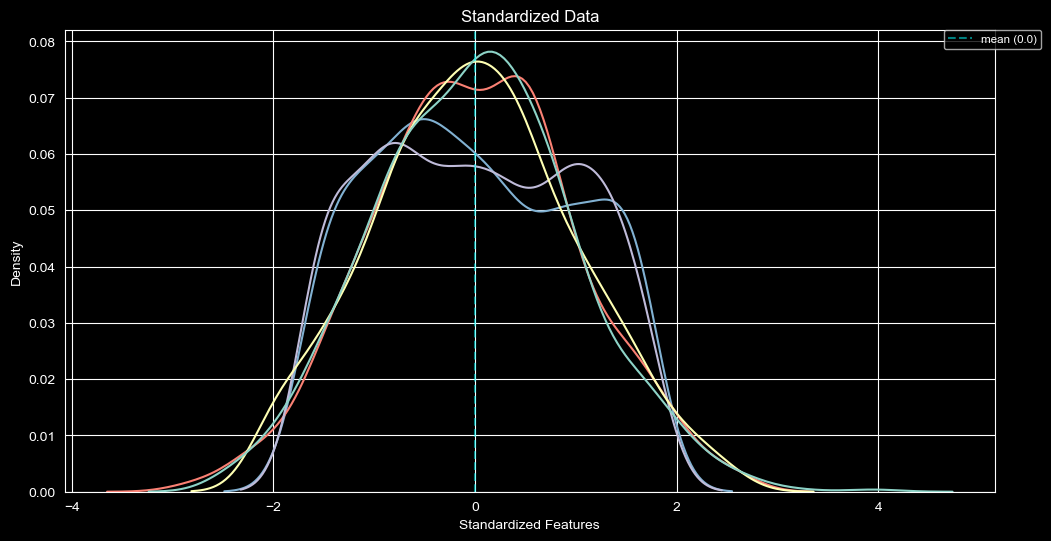

In [94]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df_scaled[features])

plt.title("Standardized Data")
plt.xlabel("Standardized Features")
plt.ylabel("Density")
plt.axvline(0, color='cyan', linestyle='--', alpha=0.5, label='mean (0.0)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0., ncol=1, fontsize='small')
plt.show()

Standardizing the predictors improves numerical stability and changes the condition number, but it does not by itself remove multicollinearity. For that, we rely mainly on VIF values and the correlation structure among predictors.

In [95]:
model_scaled = ols(model_expression_no_footfall, data=df_scaled).fit()
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     590.3
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          1.48e-264
Time:                        15:31:23   Log-Likelihood:                -2968.9
No. Observations:                 800   AIC:                             5950.
Df Residuals:                     794   BIC:                             5978.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             91.1066      0

> We dropped a lot `Cond. No.` as expected. The reduction in the `Cond. No.` confirms that scaling improved numerical stability. Combined with the low VIF values, this indicates that multicollinearity is not a concern in the model.

The final MLR model explains 78.8% of the variation in Sales (R² = 0.788, Adjusted R² = 0.787). This indicates that the model has strong prediction power for the dataset.

Four predictors are statistically significant at the 5% level (we are using $\beta$ as coef and $p$ as p-value):
* `Store_Size` ($\beta = 15.29$, $p < 0.001$): Store size increases sales by 15.29 units for each standard deviation increase in store size.

* `Advertising_Spend` ($\beta = 10.62$, $p < 0.001$): Higher advertising investment is linked to higher sales, increasing by 10.62 units for each standard deviation increase in advertising spend.

* `Customer_Rating` ($\beta = 0.90$, $p < 0.011$): Better customer ratings increase sales, adding about 0.90 units per standard deviation.

* `Discount_Rate` ($\beta = -3.07$, $p < 0.001$): Higher discount rates reduce sales, decreasing by 3.07 units on average. This may suggest lower profitability per sale.

The variable `Competitors_Nearby` is not significant $p = 0.132$ ($p > 0.05$), indicating that the number of nearby competitors does not have a meaningful effect on sales in this dataset.

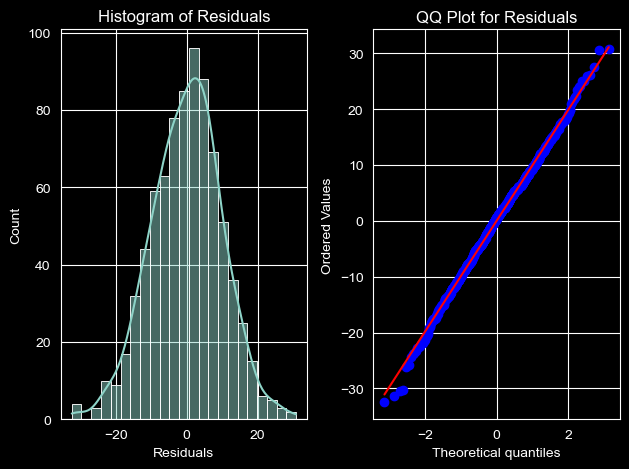

Shapiro-Wilk Test Statistic=0.9979, p-value=0.4227
✅ Residuals appear normally distributed (fail to reject H0)


In [96]:
from scipy import stats
from scipy.stats import shapiro

df_scaled['residuals'] = model_scaled.resid

# Histogram of Residuals
plt.subplot(1, 2, 1)
sns.histplot(df_scaled['residuals'], kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(df_scaled['residuals'], dist="norm", plot=plt)
plt.title("QQ Plot for Residuals")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(df_scaled['residuals'])
print(f'Shapiro-Wilk Test Statistic={stat:.4f}, p-value={p:.4f}')
if p > 0.05:
    print("✅ Residuals appear normally distributed (fail to reject H0)")
else:
    print("⚠️ Residuals deviate from normality (reject H0)")

Visually, we could check the histogram of residuals to see a bell curve that indicates a normal distribution on the residuals. Although the `Shapiro-Wilk` test may be sensitive with large samples (n = 800), both the histogram and the QQ-plot show that residuals follow a reasonably normal pattern.

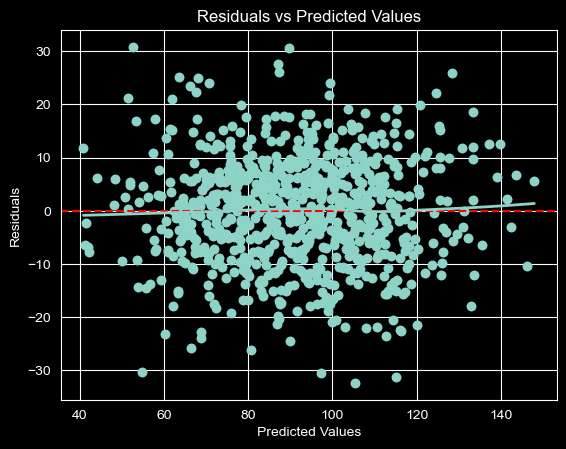

In [102]:
# Residual vs Predicted plot
df_scaled['predicted'] = model_scaled.fittedvalues

plt.scatter(df_scaled['predicted'], df_scaled['residuals'])
plt.axhline(0, color='red', linestyle='--')
sns.regplot(x='predicted', y='residuals', data=df_scaled, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

The residuals display a random scatter around zero with no visible pattern or change in variance across the predicted values, providing evidence that the homoscedasticity assumption holds for this model.

In [98]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(df_scaled['Sales'], df_scaled['predicted']))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 9.8970


The model, on average, is off by **9.8970** by thousands of ₹ (whatever it means) in its sales predictions.